**Build Your Own System**
The most obvious approach is to build it yourself. But building your own speaker identification system won’t be easy, considering you need several subsystems to successfully process speech:

Speech detection: The system must be able to separate speech from non-speech. Otherwise, it won’t be able to filter out silences and other background noise from the recording.
Speech segmentation: The system must be capable of continuously identifying the breaks between words and syllables so that it can assign them to different speakers.
Embedding extraction: Once you’ve extracted these speech segments, the system must create a neural-network based vector representation of the data. These are commonly known as embeddings.
Clustering: Finally, you need to cluster these embeddings. Once clustering is complete, the embeddings belonging to each speaker are put into one cluster and labeled accordingly.
To implement your own speaker identification system, the easiest approach is to use an open-source package like Resemblyzer, which can handle speech detection, speech segmentation, and embedding extraction. For clustering, consider an open-source package like Spectral Clustering.


Resemblyzer has many uses:

Voice similarity metric: compare different voices and get a value on how similar they sound. This leads to other applications:
Speaker verification: create a voice profile for a person from a few seconds of speech (5s - 30s) and compare it to that of new audio. Reject similarity scores below a threshold.
Speaker diarization: figure out who is talking when by comparing voice profiles with the continuous embedding of a multispeaker speech segment.
Fake speech detection: verify if some speech is legitimate or fake by comparing the similarity of possible fake speech to real speech.
High-level feature extraction: you can use the embeddings generated as feature vectors for machine learning or data analysis. This also leads to other applications:
Voice cloning: see this other project.
Component analysis: figure out accents, tones, prosody, gender, ... through a component analysis of the embeddings.
Virtual voices: create entirely new voice embeddings by sampling from a prior distribution.
Loss function: you can backpropagate through the voice encoder model and use it as a perceptual loss for your deep learning model! The voice encoder is written in PyTorch.
Resemblyzer is fast to execute (around 1000x real-time on a GTX 1080, with a minimum of 10ms for I/O operations), and can run both on CPU or GPU. It is robust to noise. It currently works best on English language only, but should still be able to perform somewhat decently on other languages.

**Resemblyzer** library, generate a numerical representation (embedding) of the voice in that audio file, and then display that embedding.

In [1]:
!pip install Resemblyzer
import resemblyzer
from resemblyzer import VoiceEncoder, preprocess_wav
from pathlib import Path
import numpy as np

fpath = Path("/content/Voice_Data_1.wav")
wav = preprocess_wav(fpath)

encoder = VoiceEncoder()
embed = encoder.embed_utterance(wav)
np.set_printoptions(precision=3, suppress=True)
print(embed)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp310-cp310-linux_x86_64.whl size=73463 sha256=16324bdab30e2f8cb13db8f42c9f6fd423b509e35e2eadc6836d3692a7301105
  Stored in directory: /root/.cache/pip/wheels/2a/2b/84/ac7bacfe8c68a87c1ee3dd3c66818a54c71599abf308e8eb35
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=85d0e191d7ca252d9121482f82b0299ef043af8168bae9dc8da733469e63d4bb
  Stored in directory: /root/.cache/pip/wheels/7c/d0/9e/1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
Successfully built webrtcvad typing


Loaded the voice encoder model on cpu in 0.04 seconds.
[0.018 0.001 0.173 0.    0.005 0.002 0.001 0.005 0.077 0.007 0.042 0.162
 0.023 0.068 0.05  0.    0.07  0.025 0.021 0.158 0.075 0.074 0.    0.
 0.001 0.037 0.011 0.002 0.    0.    0.081 0.089 0.017 0.    0.034 0.107
 0.027 0.008 0.002 0.004 0.    0.039 0.039 0.011 0.015 0.019 0.002 0.005
 0.049 0.006 0.    0.103 0.006 0.    0.    0.008 0.058 0.    0.043 0.039
 0.026 0.029 0.093 0.024 0.037 0.    0.111 0.094 0.    0.013 0.014 0.046
 0.    0.141 0.055 0.02  0.    0.065 0.05  0.121 0.028 0.034 0.105 0.04
 0.    0.002 0.004 0.06  0.    0.163 0.037 0.    0.01  0.    0.    0.
 0.002 0.    0.    0.    0.005 0.    0.084 0.107 0.049 0.022 0.062 0.004
 0.001 0.081 0.    0.027 0.    0.14  0.055 0.    0.075 0.042 0.005 0.002
 0.047 0.092 0.206 0.032 0.054 0.052 0.302 0.108 0.024 0.    0.003 0.001
 0.034 0.068 0.064 0.027 0.052 0.02  0.023 0.048 0.014 0.    0.047 0.034
 0.019 0.001 0.169 0.    0.166 0.038 0.198 0.128 0.    0.011 0.046 0.096
 0.

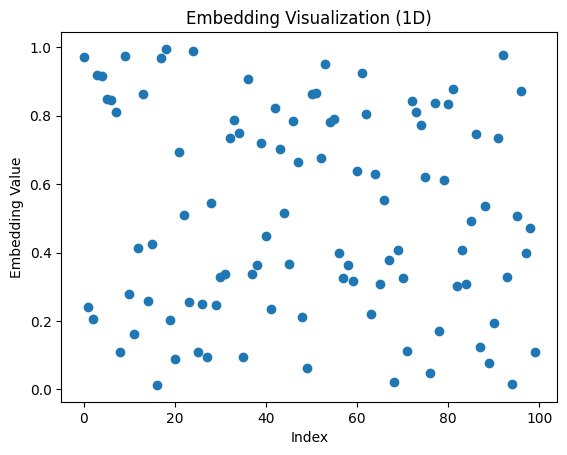

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'embed' is a 1D numpy array
# Example data (replace this with your 'embed' data)
embed = np.random.rand(100)  # Generating random data for demonstration

plt.scatter(range(len(embed)), embed)  # Scatter plot for 1D embedding
plt.title('Embedding Visualization (1D)')
plt.xlabel('Index')
plt.ylabel('Embedding Value')
plt.show()


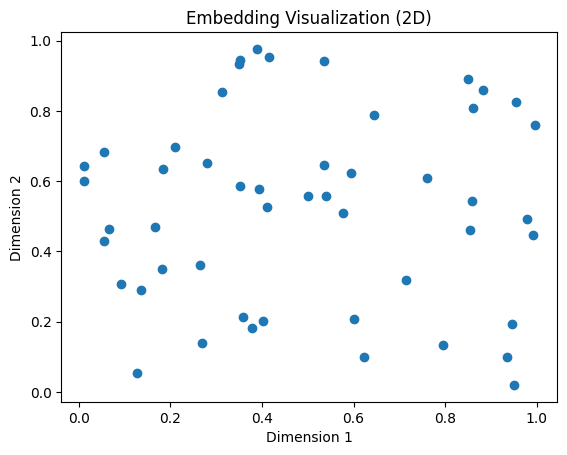

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'embed' is a 1D numpy array that needs to be reshaped into 2D (replace this with your actual data)
# Generating example data for demonstration
embed = np.random.rand(100)  # Replace this line with your 'embed' data

# Reshape the 1D array into a 2D array with 2 columns
embed_2d = embed.reshape(-1, 2)

plt.scatter(embed_2d[:, 0], embed_2d[:, 1])  # Scatter plot for 2D embedding
plt.title('Embedding Visualization (2D)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()
